## Predicting fare of a taxi ride in chicago


In [1]:
import kagglehub

path = kagglehub.dataset_download("adelanseur/taxi-trips-chicago-2024")

d:\Semester05\ML\Machine-Learning-AVV\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 111M/111M [03:46<00:00, 513kB/s]  

Extracting files...


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
data = pd.read_csv(path + "/Taxi_Trips_-_2024_20240408.csv")
data

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,NaN,NaN,8.0,8.0,...,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,NaN,NaN,24.0,8.0,...,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,NaN,NaN,56.0,NaN,...,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,NaN,NaN,76.0,3.0,...,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,NaN,NaN,8.0,3.0,...,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865242,9e8e52afb83340357ee83796469162c7d8774099,bb277fc77c865565c0fc305dcad0c6b6633e72ce0fcfac...,01/01/2024 12:00:00 AM,01/01/2024 12:00:00 AM,347.0,1.17,NaN,NaN,6.0,7.0,...,0.0,6.25,Cash,Chicago Independents,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
865243,ea3edb137b267a462a73c53fa2e354f60746560e,931225a382fc38a75212f9d358439aec0d9b50fdaf32ad...,01/01/2024 12:00:00 AM,01/01/2024 12:15:00 AM,1193.0,10.58,NaN,NaN,56.0,28.0,...,6.0,38.50,Credit Card,Flash Cab,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
865244,ddcd4d6b7c138bee6841a7800cfbb45f31e6101a,0fdab9be71f6d88e3d3a2e115afc5a33d2bf74153792c5...,01/01/2024 12:00:00 AM,01/01/2024 12:45:00 AM,3059.0,17.44,1.703198e+10,1.703132e+10,76.0,32.0,...,4.0,66.30,Credit Card,City Service,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
865245,bdc420394ce5e864465df0a361dfbe95a4e228c4,389f01c14b097ed951468ff163ccc71ebcb99a27e523e9...,01/01/2024 12:00:00 AM,01/01/2024 12:30:00 AM,1369.0,3.07,NaN,NaN,8.0,24.0,...,1.0,26.00,Mobile,Medallion Leasin,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)


In [8]:
# Taking only basic required features from the data
data = data[['Trip Miles', "Fare"]]

In [9]:
# As we have lot of values, we drop records with empty values
data.dropna(inplace=True)
data

,Trip Miles,Fare
0,0.09,3.25
1,3.00,12.00
2,5.84,16.75
3,13.36,34.75
4,6.13,18.51
...,...,...
865242,1.17,6.25
865243,10.58,28.00
865244,17.44,50.75
865245,3.07,14.50


In [ ]:
# Test train split
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :1], data.iloc[:, 1:2], test_size=0.2, random_state = 42)

In [12]:
# Fitting the model
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

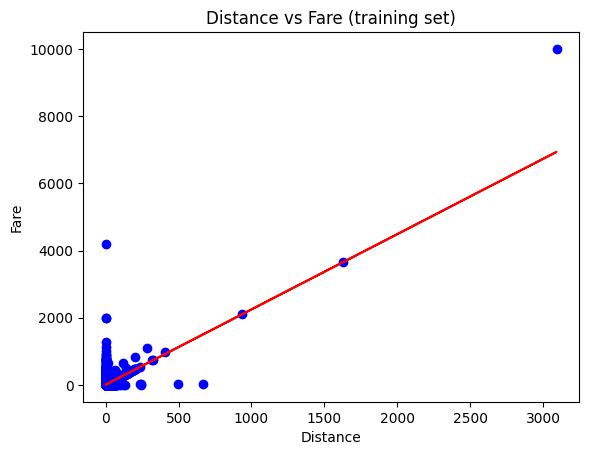

In [13]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('Distance vs Fare (training set)')
plt.xlabel('Distance' )
plt.ylabel('Fare')
plt.show()

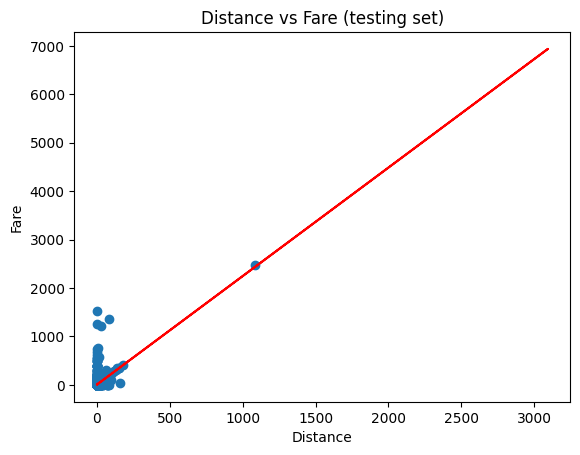

In [15]:
plt.scatter(x_test, y_test)
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('Distance vs Fare (testing set)')
plt.xlabel('Distance' )
plt.ylabel('Fare')
plt.show()